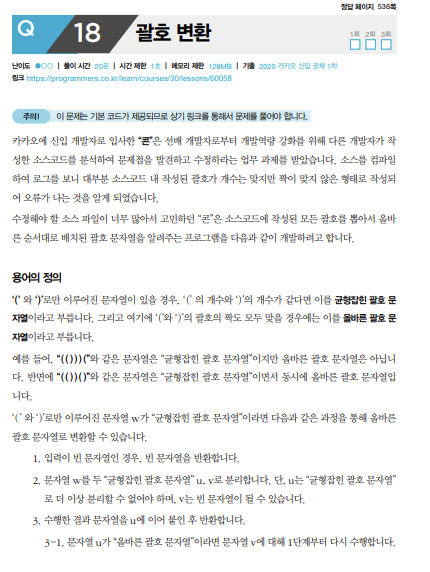

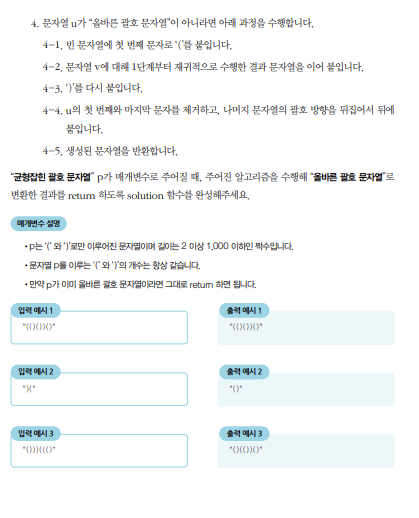

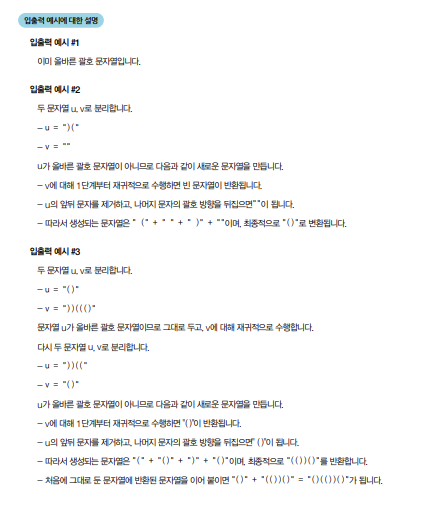

In [1]:
'''
문자열 w가 "균형잡힌 괄호 문자열" 이라면 
다음과 같은 과정을 통해 
"올바른 괄호 문자열"로 변환할 수 있습니다.
'''


'\n문자열 w가 "균형잡힌 괄호 문자열" 이라면 \n다음과 같은 과정을 통해 \n"올바른 괄호 문자열"로 변환할 수 있습니다.\n'

In [4]:
# if "균형잡힌 괄호 문자열", then return True
def isBanlancedString(str):
    return str.count('(') == str.count(')')

# if "올바른 괄호 문자열", then return True
def isCorrectString(str):
    count = 0
    for s in str:
        if s == '(':
            count += 1
        else: # ')'
            count -= 1
        if count < 0:
            return False
    return count == 0

def process(str):
    # 1. 입력이 빈 문자열인 경우, 빈 문자열을 반환합니다.
    if str == "":
        return ""
    # 2. 문자열 w를 두 "균형잡힌 괄호 문자열" u, v로 분리합니다. 단, u는 "균형잡힌 괄호 문자열"로 더 이상 분리할 수 없어야 하며, v는 빈 문자열이 될 수 있습니다.
    u, v = splitUV(str)
    print(u, v)
    # 3. 문자열 u가 "올바른 괄호 문자열" 이라면 문자열 v에 대해 1단계부터 다시 수행합니다.
    #   3-1. 수행한 결과 문자열을 u에 이어 붙인 후 반환합니다.
    if isCorrectString(u):
        u += process(v)
        return u
    else: # 4. 문자열 u가 "올바른 괄호 문자열"이 아니라면 아래 과정을 수행합니다.
    #   4-1. 빈 문자열에 첫 번째 문자로 '('를 붙입니다.
        newStr = "("
    #   4-2. 문자열 v에 대해 1단계부터 재귀적으로 수행한 결과 문자열을 이어 붙입니다.
        newStr += process(v)
    #   4-3. ')'를 다시 붙입니다.
        newStr += ")"
    #   4-4. u의 첫 번째와 마지막 문자를 제거하고, 나머지 문자열의 괄호 방향을 뒤집어서 뒤에 붙입니다.
        if len(u) > 0:
            newStr += reverseStr(u[1:-1])
    #   4-5. 생성된 문자열을 반환합니다.
        return newStr

def reverseStr(str):
    ans = ""
    for s in str:
        if s == "(":
            ans += ")"
        else:
            ans += "("
    return ans

# 2. 문자열 w를 두 "균형잡힌 괄호 문자열" u, v로 분리합니다. 단, u는 "균형잡힌 괄호 문자열"로 더 이상 분리할 수 없어야 하며, v는 빈 문자열이 될 수 있습니다.
def splitUV(str):
    u, v = str, ""
    for i in range(2, len(str), 2):
        if isBanlancedString(str[:i]):
            u = str[:i]
            v = str[i:]
            break
    return u, v

def solution(p):
    p = p.strip()

    if isCorrectString(p): # 이미 올바른 괄호 문자열이라면 그대로 return
        return p

    return process(p)

In [5]:
str = "(())()))"
solution(str)

(()) ()))
() ))
)) 


'(())()()'

## 답지VER

In [1]:
# "균형잡힌 괄호 문자열"의 인덱스 반환
def balanced_index(p):
    count = 0 # 왼쪽 괄호의 개수
    for i in range(len(p)):
        if p[i] == '(':
            count += 1
        else:
            count -= 1
        if count == 0:
            return i

# "올바른 괄호 문자열"인지 판단
def check_proper(p):
    count = 0 # 왼쪽 괄호의 개수
    for i in p:
        if i == '(':
            count += 1
        else:
            if count == 0: # 쌍이 맞지 않는 경우에 False 반환
                return False
            count -= 1
    return True # 쌍이 맞는 경우에 True 반환

def solution(p):
    answer = ''
    if p == '':
        return answer
    index = balanced_index(p)
    u = p[:index + 1]
    v = p[index + 1:]
    # "올바른 괄호 문자열"이면, v에 대해 함수를 수행한 결과를 붙여 반환
    if check_proper(u):
        answer = u + solution(v)
    # "올바른 괄호 문자열"이 아니라면 아래의 과정을 수행
    else:
        answer = '('
        answer += solution(v)
        answer += ')'
        u = list(u[1:-1]) # 첫 번째와 마지막 문자를 제거
        for i in range(len(u)):
            if u[i] == '(':
                u[i] = ')'
            else:
                u[i] = '('
        answer += "".join(u)
    return answer

In [6]:
p = "(())()))"
solution(p)

(()) ()))
() ))
)) 


'(())()()'